In [1]:
# In this part, we will perform a Statistical Analysis
# We will also develop a Univariate Linear Regression model
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

In [2]:
# First, we import the file
# W have deleted some columns that either contained redundant information or had barely any correlation to 'SalePrice'
# We have kept some columns with non-numerical values
# We know that non-numerical values will be excluded when it comes to analysing correlation, so I decided to preserve the set
house_data = r"C:\Users\sveta\Desktop\Python for GitHub\Machine Learning\houses_dataset2.csv"
house_price = pd.read_csv(house_data, header=0)
house_price.head()

,Id,MSZoning,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallQual_binned,Normalized_OverallQual,Normalized_SalePrice
0,1,RL,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,2,2008,WD,Normal,208500,Medium,0.029293,0.027617
1,2,RL,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,0,5,2007,WD,Normal,181500,Medium,0.025108,0.024041
2,3,RL,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,9,2008,WD,Normal,223500,Medium,0.029293,0.029604
3,4,RL,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0,0,2,2006,WD,Abnorml,140000,Medium,0.029293,0.018544
4,5,RL,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,0,0,12,2008,WD,Normal,250000,High,0.033477,0.033114


In [3]:
# Let's begin with finding what month has the most number of sales
# We count sales per month
print(house_price.groupby('MoSold')['Id'].count())

MoSold
1      58
2      52
3     106
4     141
5     204
6     253
7     234
8     122
9      63
10     89
11     79
12     59
Name: Id, dtype: int64


In [4]:
# Next let's find out what year has the most number of sales
print(house_price.groupby('YrSold')['Id'].count())

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: Id, dtype: int64


In [5]:
# We can use method .corr() to return a correlation matrix
# By default, Pearson correlation method is used
house_price.corr()

,Id,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice,Normalized_OverallQual,Normalized_SalePrice
Id,1.000000,-0.033226,-0.028365,-0.012713,-0.021998,-0.051071,-0.005024,-0.007940,-0.015415,0.010496,...,0.017634,-0.029643,-0.000477,0.001330,0.057044,0.021172,0.000712,-0.021917,-0.028365,-0.021917
LotArea,-0.033226,1.000000,0.105806,0.014228,0.013788,0.103321,0.214103,-0.002618,0.260833,0.299475,...,0.180403,0.171698,0.084774,0.043160,0.077672,0.001205,-0.014261,0.263843,0.105806,0.263843
OverallQual,-0.028365,0.105806,1.000000,0.572323,0.550684,0.407252,0.239666,0.308159,0.537808,0.476224,...,0.562022,0.238923,0.308819,0.064886,0.065166,0.070815,-0.027347,0.790982,1.000000,0.790982
YearBuilt,-0.012713,0.014228,0.572323,1.000000,0.592855,0.311600,0.249503,0.149040,0.391452,0.281986,...,0.478954,0.224880,0.188686,-0.050364,0.004950,0.012398,-0.013618,0.522897,0.572323,0.522897
YearRemodAdd,-0.021998,0.013788,0.550684,0.592855,1.000000,0.176529,0.128451,0.181133,0.291066,0.240379,...,0.371600,0.205726,0.226298,-0.038740,0.005829,0.021490,0.035743,0.507101,0.550684,0.507101
MasVnrArea,-0.051071,0.103321,0.407252,0.311600,0.176529,1.000000,0.261256,0.113862,0.360067,0.339850,...,0.370884,0.159991,0.122528,0.062248,0.011928,-0.006723,-0.008317,0.472614,0.407252,0.472614
BsmtFinSF1,-0.005024,0.214103,0.239666,0.249503,0.128451,0.261256,1.000000,-0.495251,0.522396,0.445863,...,0.296970,0.204306,0.111761,0.062021,0.140491,-0.015727,0.014359,0.386420,0.239666,0.386420
BsmtUnfSF,-0.007940,-0.002618,0.308159,0.149040,0.181133,0.113862,-0.495251,1.000000,0.415360,0.317987,...,0.183303,-0.005316,0.129005,-0.012579,-0.035092,0.034888,-0.041258,0.214479,0.308159,0.214479
TotalBsmtSF,-0.015415,0.260833,0.537808,0.391452,0.291066,0.360067,0.522396,0.415360,1.000000,0.819530,...,0.486665,0.232019,0.247264,0.084489,0.126053,0.013196,-0.014969,0.613581,0.537808,0.613581
1stFlrSF,0.010496,0.299475,0.476224,0.281986,0.240379,0.339850,0.445863,0.317987,0.819530,1.000000,...,0.489782,0.235459,0.211671,0.088758,0.131525,0.031372,-0.013604,0.605852,0.476224,0.605852


In [6]:
# We can also run .corrwith() on our target variable to get the correlation coefficients
house_price.corrwith(house_price['SalePrice'])

Id                       -0.021917
LotArea                   0.263843
OverallQual               0.790982
YearBuilt                 0.522897
YearRemodAdd              0.507101
MasVnrArea                0.472614
BsmtFinSF1                0.386420
BsmtUnfSF                 0.214479
TotalBsmtSF               0.613581
1stFlrSF                  0.605852
2ndFlrSF                  0.319334
GrLivArea                 0.708624
BsmtFullBath              0.227122
FullBath                  0.560664
HalfBath                  0.284108
BedroomAbvGr              0.168213
TotRmsAbvGrd              0.533723
Fireplaces                0.466929
GarageCars                0.640409
GarageArea                0.623431
WoodDeckSF                0.324413
OpenPorchSF               0.315856
ScreenPorch               0.111447
PoolArea                  0.092404
MoSold                    0.046432
YrSold                   -0.028923
SalePrice                 1.000000
Normalized_OverallQual    0.790982
Normalized_SalePrice

In [7]:
# We will drop some more columns which are barely correlated to price
# Dropping the columns will allow us to have a better heatmap representation
# However, it is always a good practice to remember that we have to be extremely careful about dropping any columns
house_price.drop(['LotArea', 'BsmtUnfSF', 'BsmtFullBath', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea'], axis = 1, inplace = True)
# Run a check
house_price.dtypes

Id                          int64
MSZoning                   object
LotShape                   object
LandContour                object
Utilities                  object
LotConfig                  object
LandSlope                  object
Neighborhood               object
Condition1                 object
Condition2                 object
BldgType                   object
HouseStyle                 object
OverallQual                 int64
YearBuilt                   int64
YearRemodAdd                int64
RoofStyle                  object
RoofMatl                   object
Exterior1st                object
Exterior2nd                object
MasVnrType                 object
MasVnrArea                  int64
ExterQual                  object
ExterCond                  object
Foundation                 object
BsmtQual                   object
BsmtCond                   object
BsmtExposure               object
BsmtFinType1               object
BsmtFinSF1                  int64
BsmtFinType2  

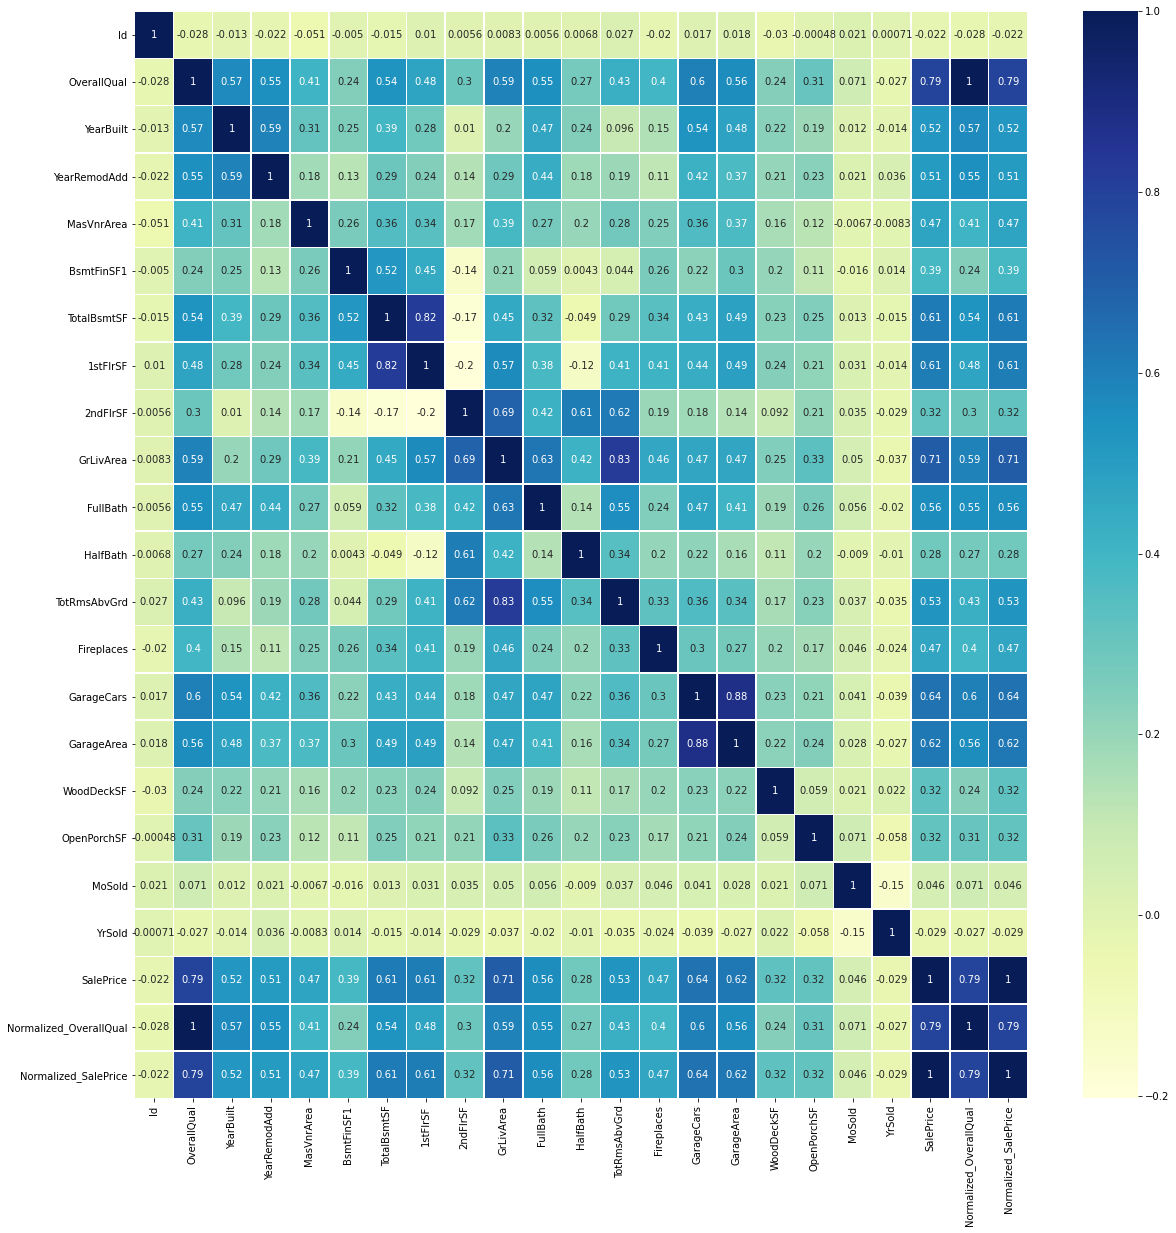

In [8]:
# Let's visualize the correlation matrix using a heatmap
# Which feature may be the best predictor of price based on the correlation?
correlation = house_price.corr()
plt.figure(figsize = (20,20))
heatmap = sns.heatmap(correlation, annot=True, linewidths = .5, cmap="YlGnBu")

<AxesSubplot:>

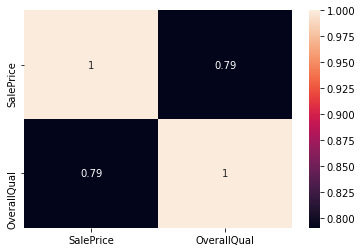

In [9]:
# 'OverallQual' (and its normalized version) has the highest correlation coeeficient in regards to our target variable
# Normalization does not affect the correlation between the target and the feature
# It will change our coefficients, though, and we will see it when we build a model
plt.subplot(1,1,1)
sns.heatmap(house_price[['SalePrice', 'OverallQual']].corr(), annot=True)

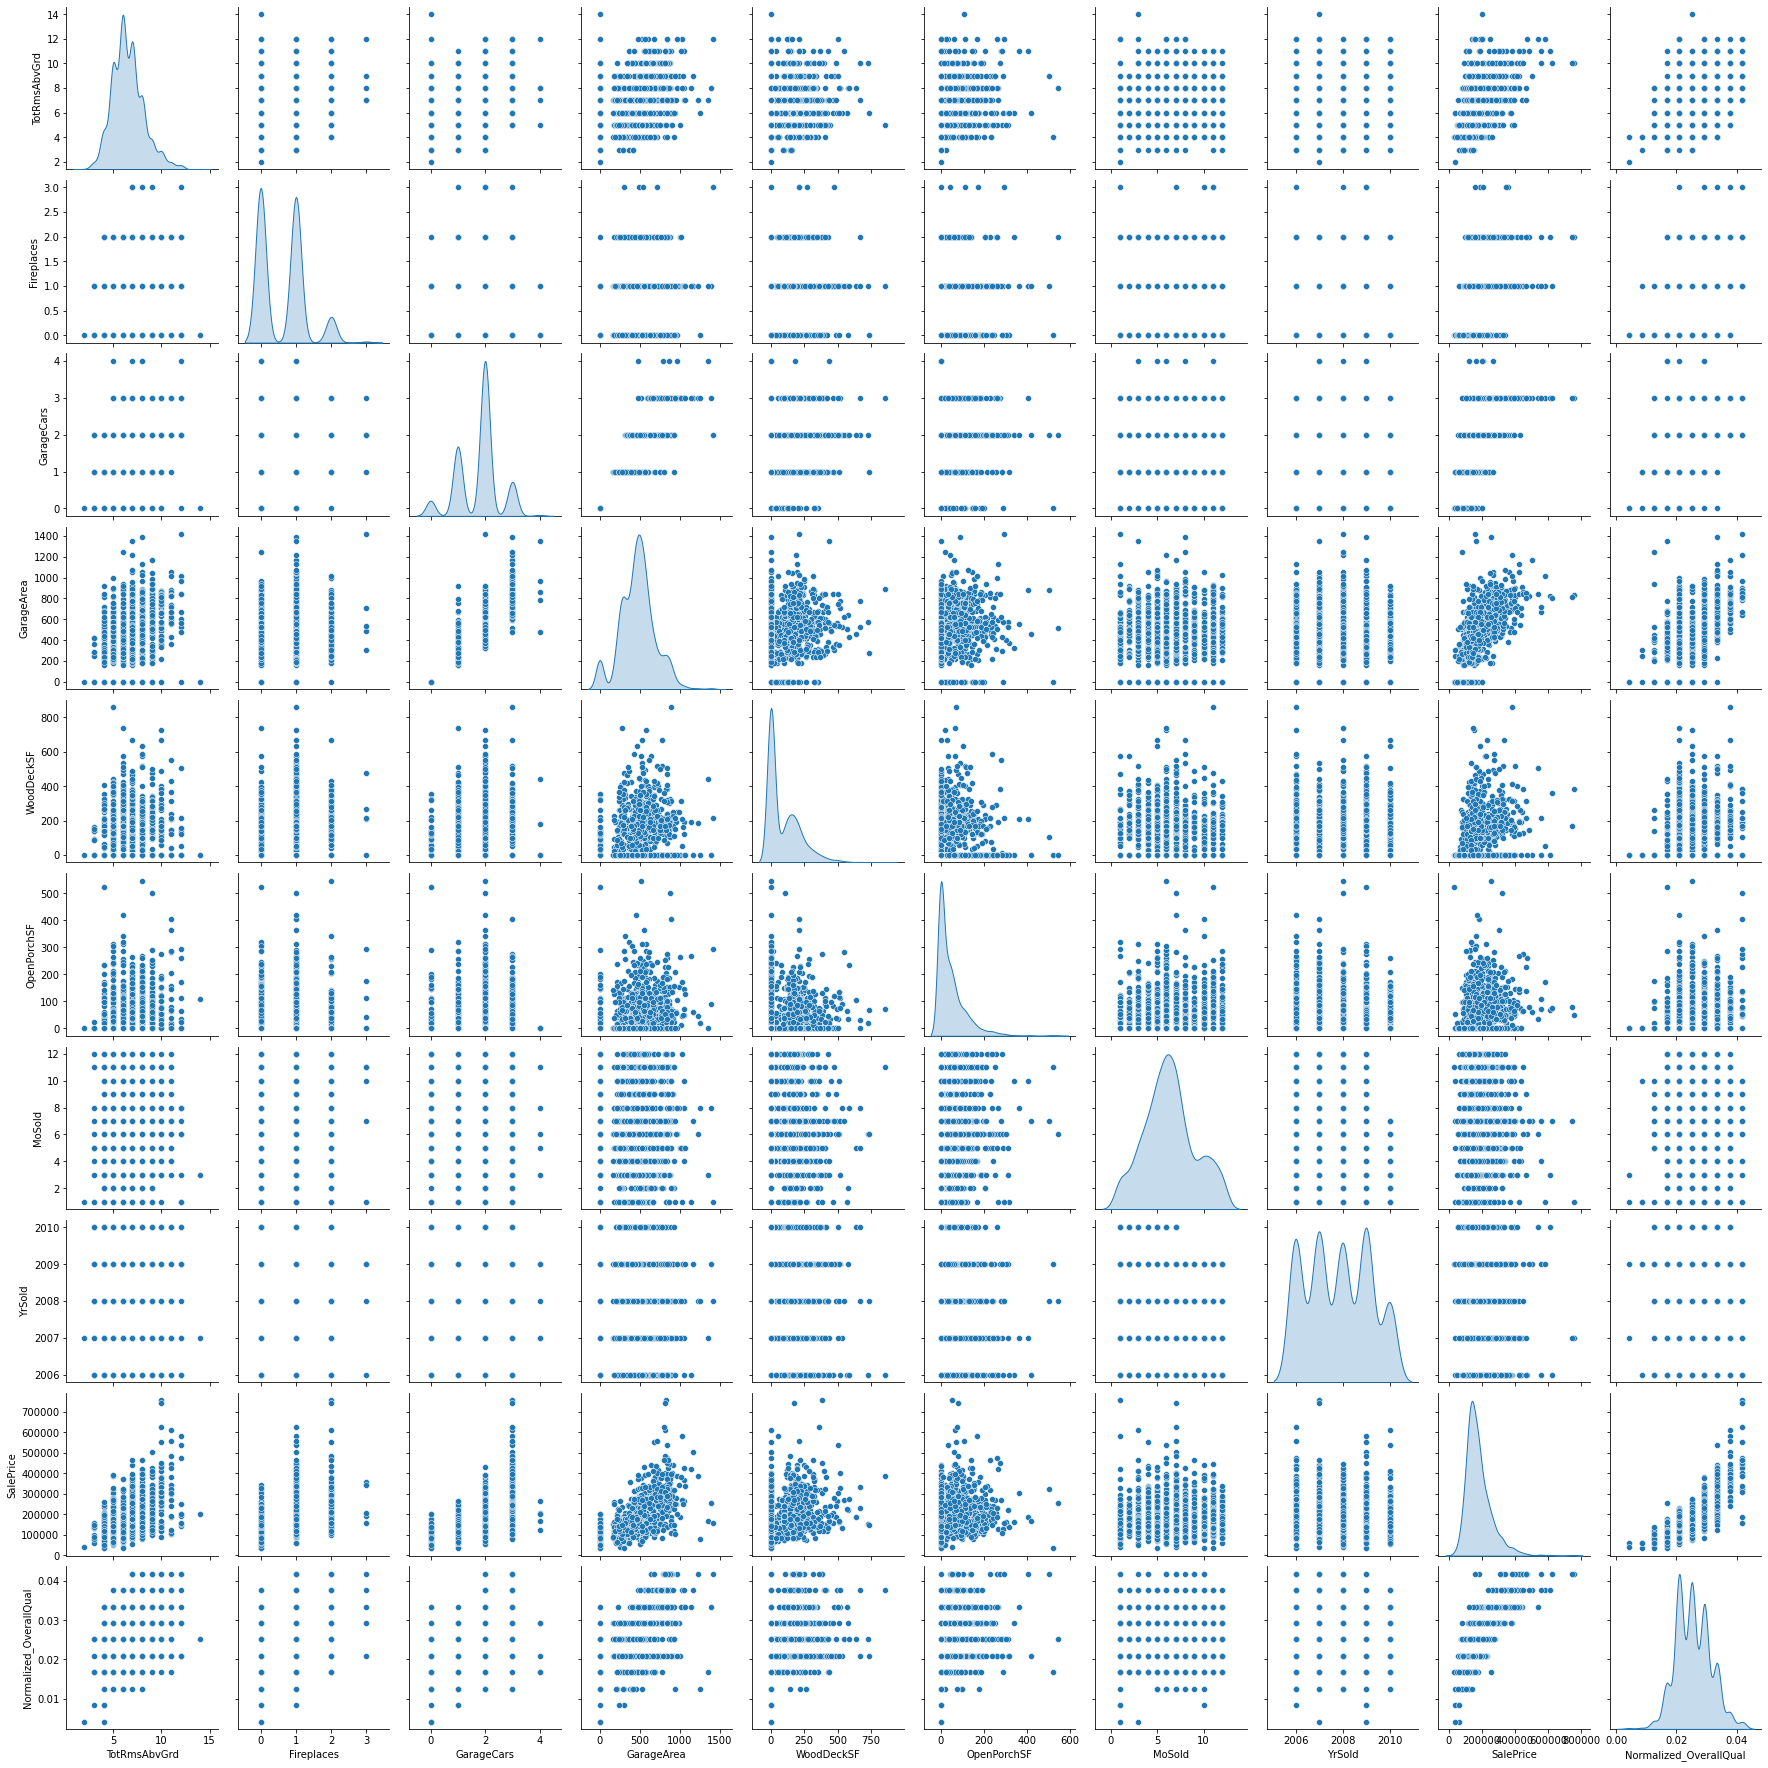

In [10]:
# Pairplot helps to plot pairwise relationship in a dataset
# We can select what columns we would like to see in a pairplot
# Let's draw a pairplot for the last 15 columns
# It's important to remember that a pairplot is not displayed on data type 'object'
fifteen_columns = house_price.iloc[:, -16:-1]
sns.pairplot(fifteen_columns, diag_kind='kde')

(0.0, 791005.0)

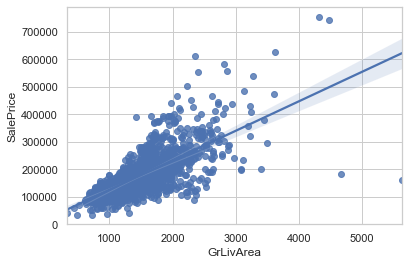

In [11]:
# 'SalePrice' columns is highly correlated to several features
# For example, we see a strong correlation between 'SalePrice' and 'GrLivArea' from the correlation matrix
# Let's draw a scatterplot in Seaborn to vizualize the relationship
sns.set_theme(style = "whitegrid")
sns.regplot(x = 'GrLivArea', y = 'SalePrice', data = house_price)
plt.ylim(0,)

(0.0, 791005.0)

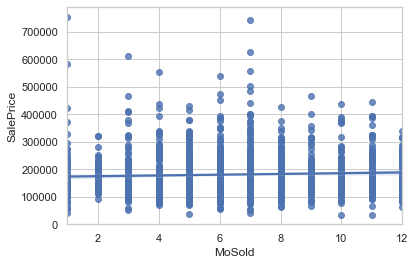

In [12]:
# Let's compare the previous scatterplot with a weak relationship scatterplot
# The correlation coefficient is 0.046 between 'SalePrice' and'MoSold'
# Therefore, scatterplot is not useful in this example
sns.regplot(x = 'MoSold', y = 'SalePrice', data = house_price)
plt.ylim(0,)

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

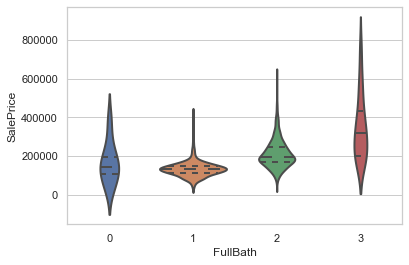

In [13]:
# Violin plots are useful when we want to see the relationship between numeric data
# The violin plot below also showcases the quartiles of the distribution
# We can see that the interquartile price range is significantly wider for 3 full baths compared to 1 bath
sns.violinplot(x = 'FullBath', y = 'SalePrice', data = house_price, linewidth = 2, inner = 'quart')

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

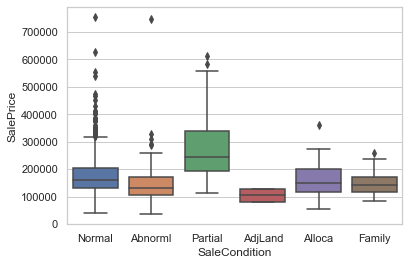

In [14]:
# We can always use a boxplot to visualize the distribution
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = house_price)

<AxesSubplot:>

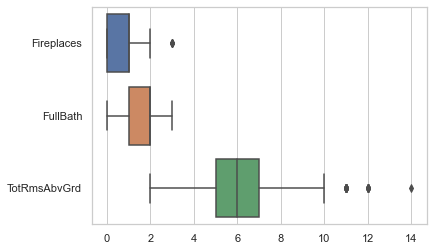

In [15]:
# A horizontal boxplot can be drawn only on numerical data
sns.boxplot( data = house_price[['Fireplaces', 'FullBath', 'TotRmsAbvGrd']], orient = "h")

In [16]:
# .describe() outputs Descriptive Statistics measurements
# Default .describe() skips NaN values
# Columns with value type set to 'object' are omitted
house_price.describe()

,Id,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,Normalized_OverallQual,Normalized_SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,6.099315,1971.267808,1984.865753,103.117123,443.639726,1057.429452,1162.626712,346.992466,1515.463699,...,0.613014,1.767123,472.980137,94.244521,46.660274,6.321918,2007.815753,180921.195890,0.025524,0.023964
std,421.610009,1.382997,30.202904,20.645407,180.731373,456.098091,438.705324,386.587738,436.528436,525.480383,...,0.644666,0.747315,213.804841,125.338794,66.256028,2.703626,1.328095,79442.502883,0.005787,0.010523
min,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.004185,0.004623
25%,365.750000,5.000000,1954.000000,1967.000000,0.000000,0.000000,795.750000,882.000000,0.000000,1129.500000,...,0.000000,1.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000,0.020923,0.017216
50%,730.500000,6.000000,1973.000000,1994.000000,0.000000,383.500000,991.500000,1087.000000,0.000000,1464.000000,...,1.000000,2.000000,480.000000,0.000000,25.000000,6.000000,2008.000000,163000.000000,0.025108,0.021590
75%,1095.250000,7.000000,2000.000000,2004.000000,164.250000,712.250000,1298.250000,1391.250000,728.000000,1776.750000,...,1.000000,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,214000.000000,0.029293,0.028346
max,1460.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,6110.000000,4692.000000,2065.000000,5642.000000,...,3.000000,4.000000,1418.000000,857.000000,547.000000,12.000000,2010.000000,755000.000000,0.041847,0.100005


In [17]:
# If we don't want to skip NaN values, we set 'include' parameter equal to 'all'
# This might come in handy wwhen we want to decide wthether or not to omit some columns
house_price.describe(include = 'all')

,Id,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallQual_binned,Normalized_OverallQual,Normalized_SalePrice
count,1460.000000,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000,1460,1460.000000,1460.000000
unique,NaN,5,4,4,2,5,3,25,9,8,...,NaN,NaN,NaN,NaN,9,6,NaN,3,NaN,NaN
top,NaN,RL,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,NaN,NaN,NaN,NaN,WD,Normal,NaN,Medium,NaN,NaN
freq,NaN,1151,925,1311,1459,1052,1382,225,1260,1445,...,NaN,NaN,NaN,NaN,1267,1198,NaN,1090,NaN,NaN
mean,730.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94.244521,46.660274,6.321918,2007.815753,NaN,NaN,180921.195890,NaN,0.025524,0.023964
std,421.610009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,125.338794,66.256028,2.703626,1.328095,NaN,NaN,79442.502883,NaN,0.005787,0.010523
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000,NaN,0.004185,0.004623
25%,365.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000,NaN,0.020923,0.017216
50%,730.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,25.000000,6.000000,2008.000000,NaN,NaN,163000.000000,NaN,0.025108,0.021590
75%,1095.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,168.000000,68.000000,8.000000,2009.000000,NaN,NaN,214000.000000,NaN,0.029293,0.028346


In [18]:
# Before we build a model, we want to split the dataset
# We will split the data into train and test datasets such that the test dataset is 20% of the original data
# We can use sklearn.model_selection.train_test_split function to split the data into the subsets 
# Xtrain is 80% of observation randomly chosen 
# Xtest is the rest
from sklearn.model_selection import train_test_split

In [19]:
x = house_price['OverallQual']
y = house_price['SalePrice']

In [20]:
# test_size is where we specify that we wish to assign 20% for test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

In [21]:
# Run a check
print(len(xtrain))
print(len(xtest))
print(len(ytrain))
print(len(ytest))

1168
292
1168
292


In [22]:
# Regression using statmodels.api
# It is important to remember that in statmodels.api an intercept is not added by default
# Therefore, we add a constant
xtrain = sm.add_constant(xtrain)

In [23]:
model = sm.OLS(ytrain, xtrain)

In [24]:
results = model.fit()

In [25]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     1957.
Date:                Thu, 24 Feb 2022   Prob (F-statistic):          9.66e-252
Time:                        15:20:45   Log-Likelihood:                -14273.
No. Observations:                1168   AIC:                         2.855e+04
Df Residuals:                    1166   BIC:                         2.856e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.853e+04   6480.711    -15.204      

In [26]:
# R-squared = 0.627
# Adj. R-squared = 0.626 and is close to R-squared
# t-value is fairly far away from the mean both for the constant and OverallQual
# P-value is almost zero for both coefficients
# We can reject the null hypothesis
# Our coefficient values are statistically significant

In [27]:
# We can also use scikit-learn to build a Regression model
# The only difference is that scikit-learn doesn't return an in-depth summary, so the choice which one to use really depends on needs
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()
lm

LinearRegression()

In [29]:
# Fit the linear model in order to find slope and intercept
lm.fit(xtrain, ytrain)

LinearRegression()

In [30]:
yhat = lm.predict(xtrain)
yhat[0:5] # The prediction for y values based on the fit from above

array([222971.18331256, 177042.32017084, 131113.45702913, 222971.18331256,
       268900.04645427])

In [31]:
# The intercept
lm.intercept_

-98530.85867944316

In [32]:
# The slope
lm.coef_

array([    0.        , 45928.86314171])

In [33]:
# The equation of the predicted line: 'SalePrice' = 46298.3 * 'OverallQual' - 100677.9
# This agrees with statsmodels.api summary

In [34]:
# Now let's build SLR on data we normalized before
Xnorm = house_price['Normalized_OverallQual']
Ynorm = house_price['Normalized_SalePrice']

In [35]:
# We still split our data into train and test subsets
xntrain, xntest, yntrain, yntest = train_test_split(Xnorm, Ynorm, test_size = 0.2)

In [36]:
# Regression in statmodels.api
xntrain = sm.add_constant(xntrain)

In [39]:
model_norm = sm.OLS(yntrain, xntrain)

In [40]:
results_norm = model_norm.fit()

In [41]:
# Normalization decreased our coefficients significantly
# R-squared has changed by a little
# R-squared = 0.633 which is a good result
# But w still might want to look into Polynomial Regression to see how Higher-Order Terms can affect the R-squared
# That choice depends on how precise our model should be
# For the purpose of this project, we will accept the SLR model we have
print(results_norm.summary())

                             OLS Regression Results                             
Dep. Variable:     Normalized_SalePrice   R-squared:                       0.633
Model:                              OLS   Adj. R-squared:                  0.633
Method:                   Least Squares   F-statistic:                     2013.
Date:                  Thu, 24 Feb 2022   Prob (F-statistic):          3.39e-256
Time:                          15:26:37   Log-Likelihood:                 4253.9
No. Observations:                  1168   AIC:                            -8504.
Df Residuals:                      1166   BIC:                            -8494.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

In [42]:
# Let's build a Linear Regression for our normalized data using scikit-learn
lm_norm = LinearRegression()
lm_norm

LinearRegression()

In [43]:
# Notice that in scikit-learn x argument goes first unlike in statmodels.api
lm_norm.fit(xntrain, yntrain)

LinearRegression()

In [44]:
# The difference in coefficients is already quite noticeable
yhat_norm = lm_norm.predict(xntrain)
yhat_norm[0:5]

array([0.01738264, 0.01738264, 0.02932334, 0.01738264, 0.02335299])

In [45]:
lm_norm.intercept_

-0.012469091112235885

In [47]:
lm_norm.coef_

array([0.        , 1.42671309])

In [ ]:
# The equation of the predicted line: 
# 'Normalized_SalePrice' = 1.43 * 'Normalized_OverallQual' - 0.01
# This equation agrees with statsmodels.api summary for the normalized data